# Project - 2

# PRCP-1000-PortugeseBank

### Problem Defination

The goal is to predict whether a customer will subscribe to a term deposit based on various personal and socio-economic features. The dataset is derived from marketing campaigns conducted by a Portuguese bank, where the outcome variable (y) represents whether a customer subscribes to a term deposit or not. The challenge involves working with an imbalanced dataset, where the majority of customers did not subscribe to the deposit (No), while a minority did (Yes).

## **Attribute Information** 
**The various featureof the dataset explained below**
1. Age : (numeric)
2. Job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. Marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. Education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. Eefault: has credit in default? (categorical: 'no','yes','unknown')
6. Housing: has housing loan? (categorical: 'no','yes','unknown')
7. Loan: has personal loan? (categorical: 'no','yes','unknown')
8. Contact: contact communication type (categorical: 'cellular','telephone')
9. Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')
12. Dampaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. Previous: number of contacts performed before this campaign and for this client (numeric)
15. Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
16. Emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. Cons.price.idx: consumer price index - monthly indicator (numeric)
18. Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. Euribor3m: euribor 3 month rate - daily indicator (numeric)
20. Nr.employed: number of employees - quarterly indicator (numeric)
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

## Business Goal
**The goal is to build and optimize classification models that can accurately predict whether a customer will subscribe to a term deposit (binary outcome: Yes or No) while handling the imbalance in the data to improve predictions for the minority class (Yes).**

In [4]:
## Importing Libraries
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
## Loading Dataset
data=pd.read_csv('bank-additional-full.csv', sep =";")

In [6]:
pd.set_option('display.max_columns',None)

## Basic Checks

In [7]:
data ## Checking head and tail

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
data.shape

(41188, 21)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
data.describe() ## Summary Statistics

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


# EDA - Exploratory Data Analysis

In [12]:
## Splitting numerical and categorical features
data_cat=data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y']]
data_num=data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

## Univariate Analysis

**Numerical Features**

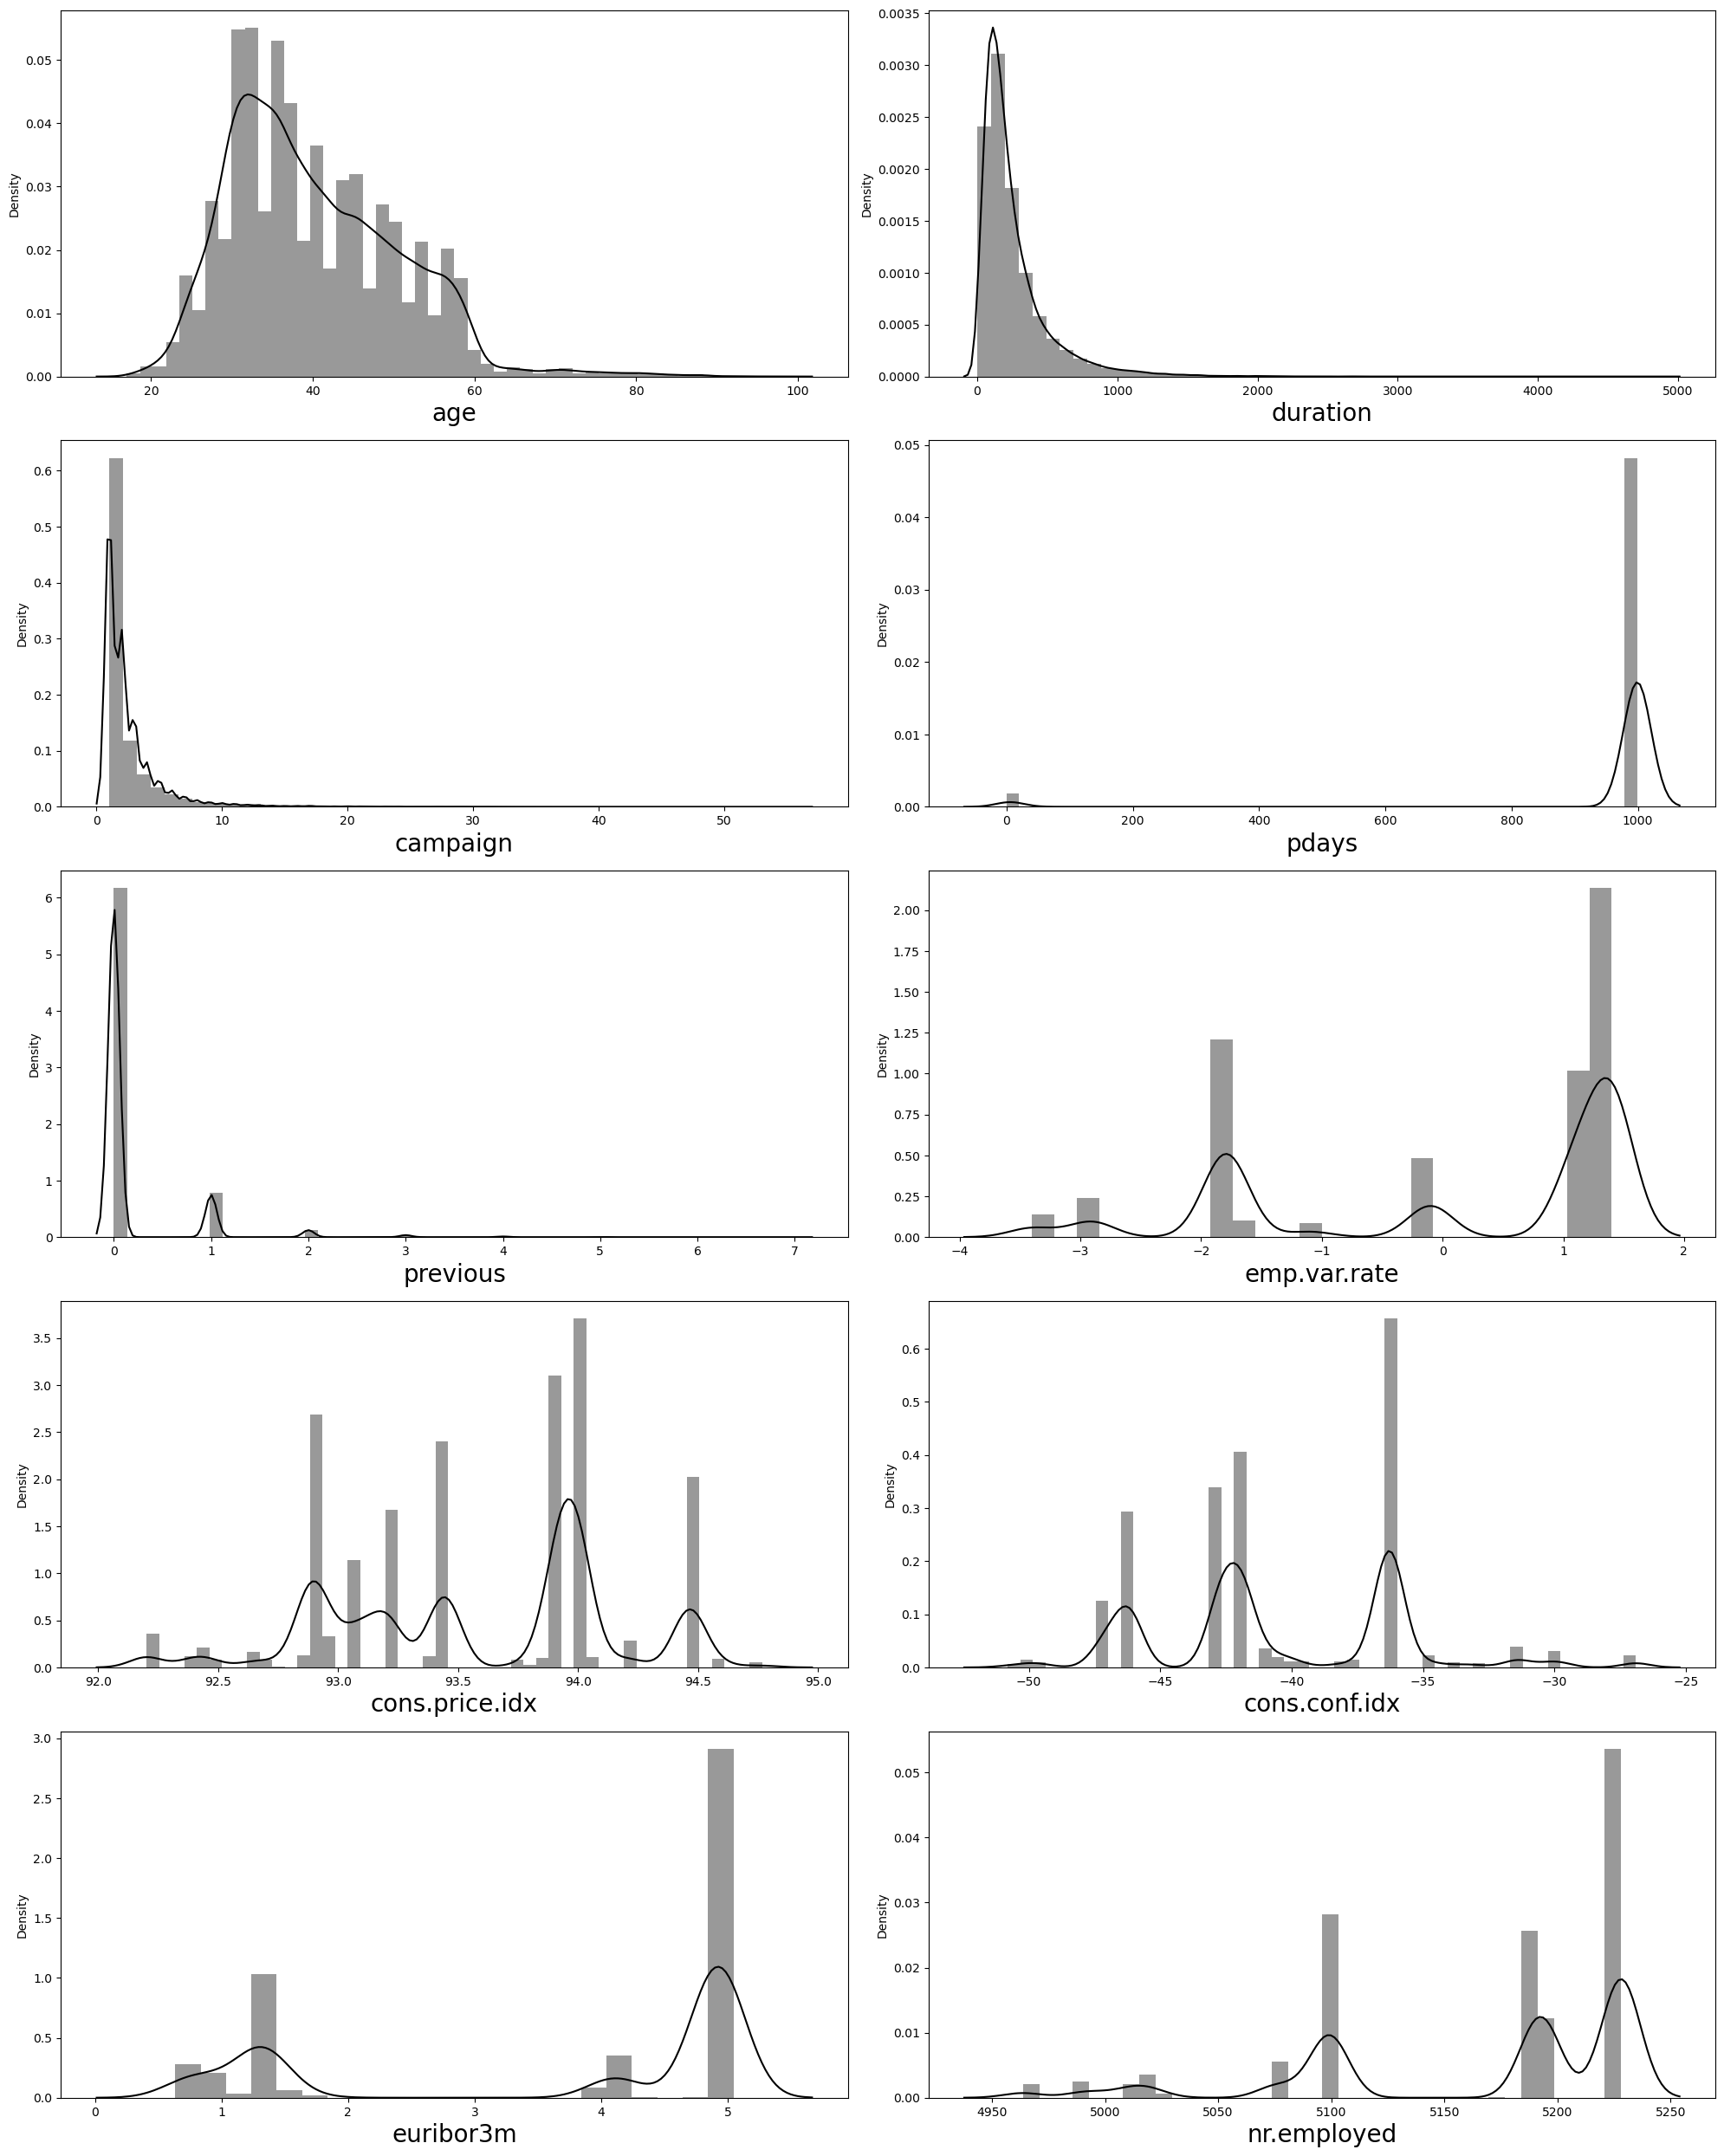

In [13]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in data_num:
    if plotnumber<=16:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(x=data_num[column],kde=True, color='k')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Categorical Features**

In [14]:
## Checking Count of Categotical features
value_counts = {col: data_cat[col].value_counts() for col in data_cat.columns}
for col, counts in value_counts.items():
    print(f"Value counts for {col}:")
    print(counts)
    print()

Value counts for job:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Value counts for marital:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Value counts for education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Value counts for default:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

Value counts for housing:
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

Value counts for 

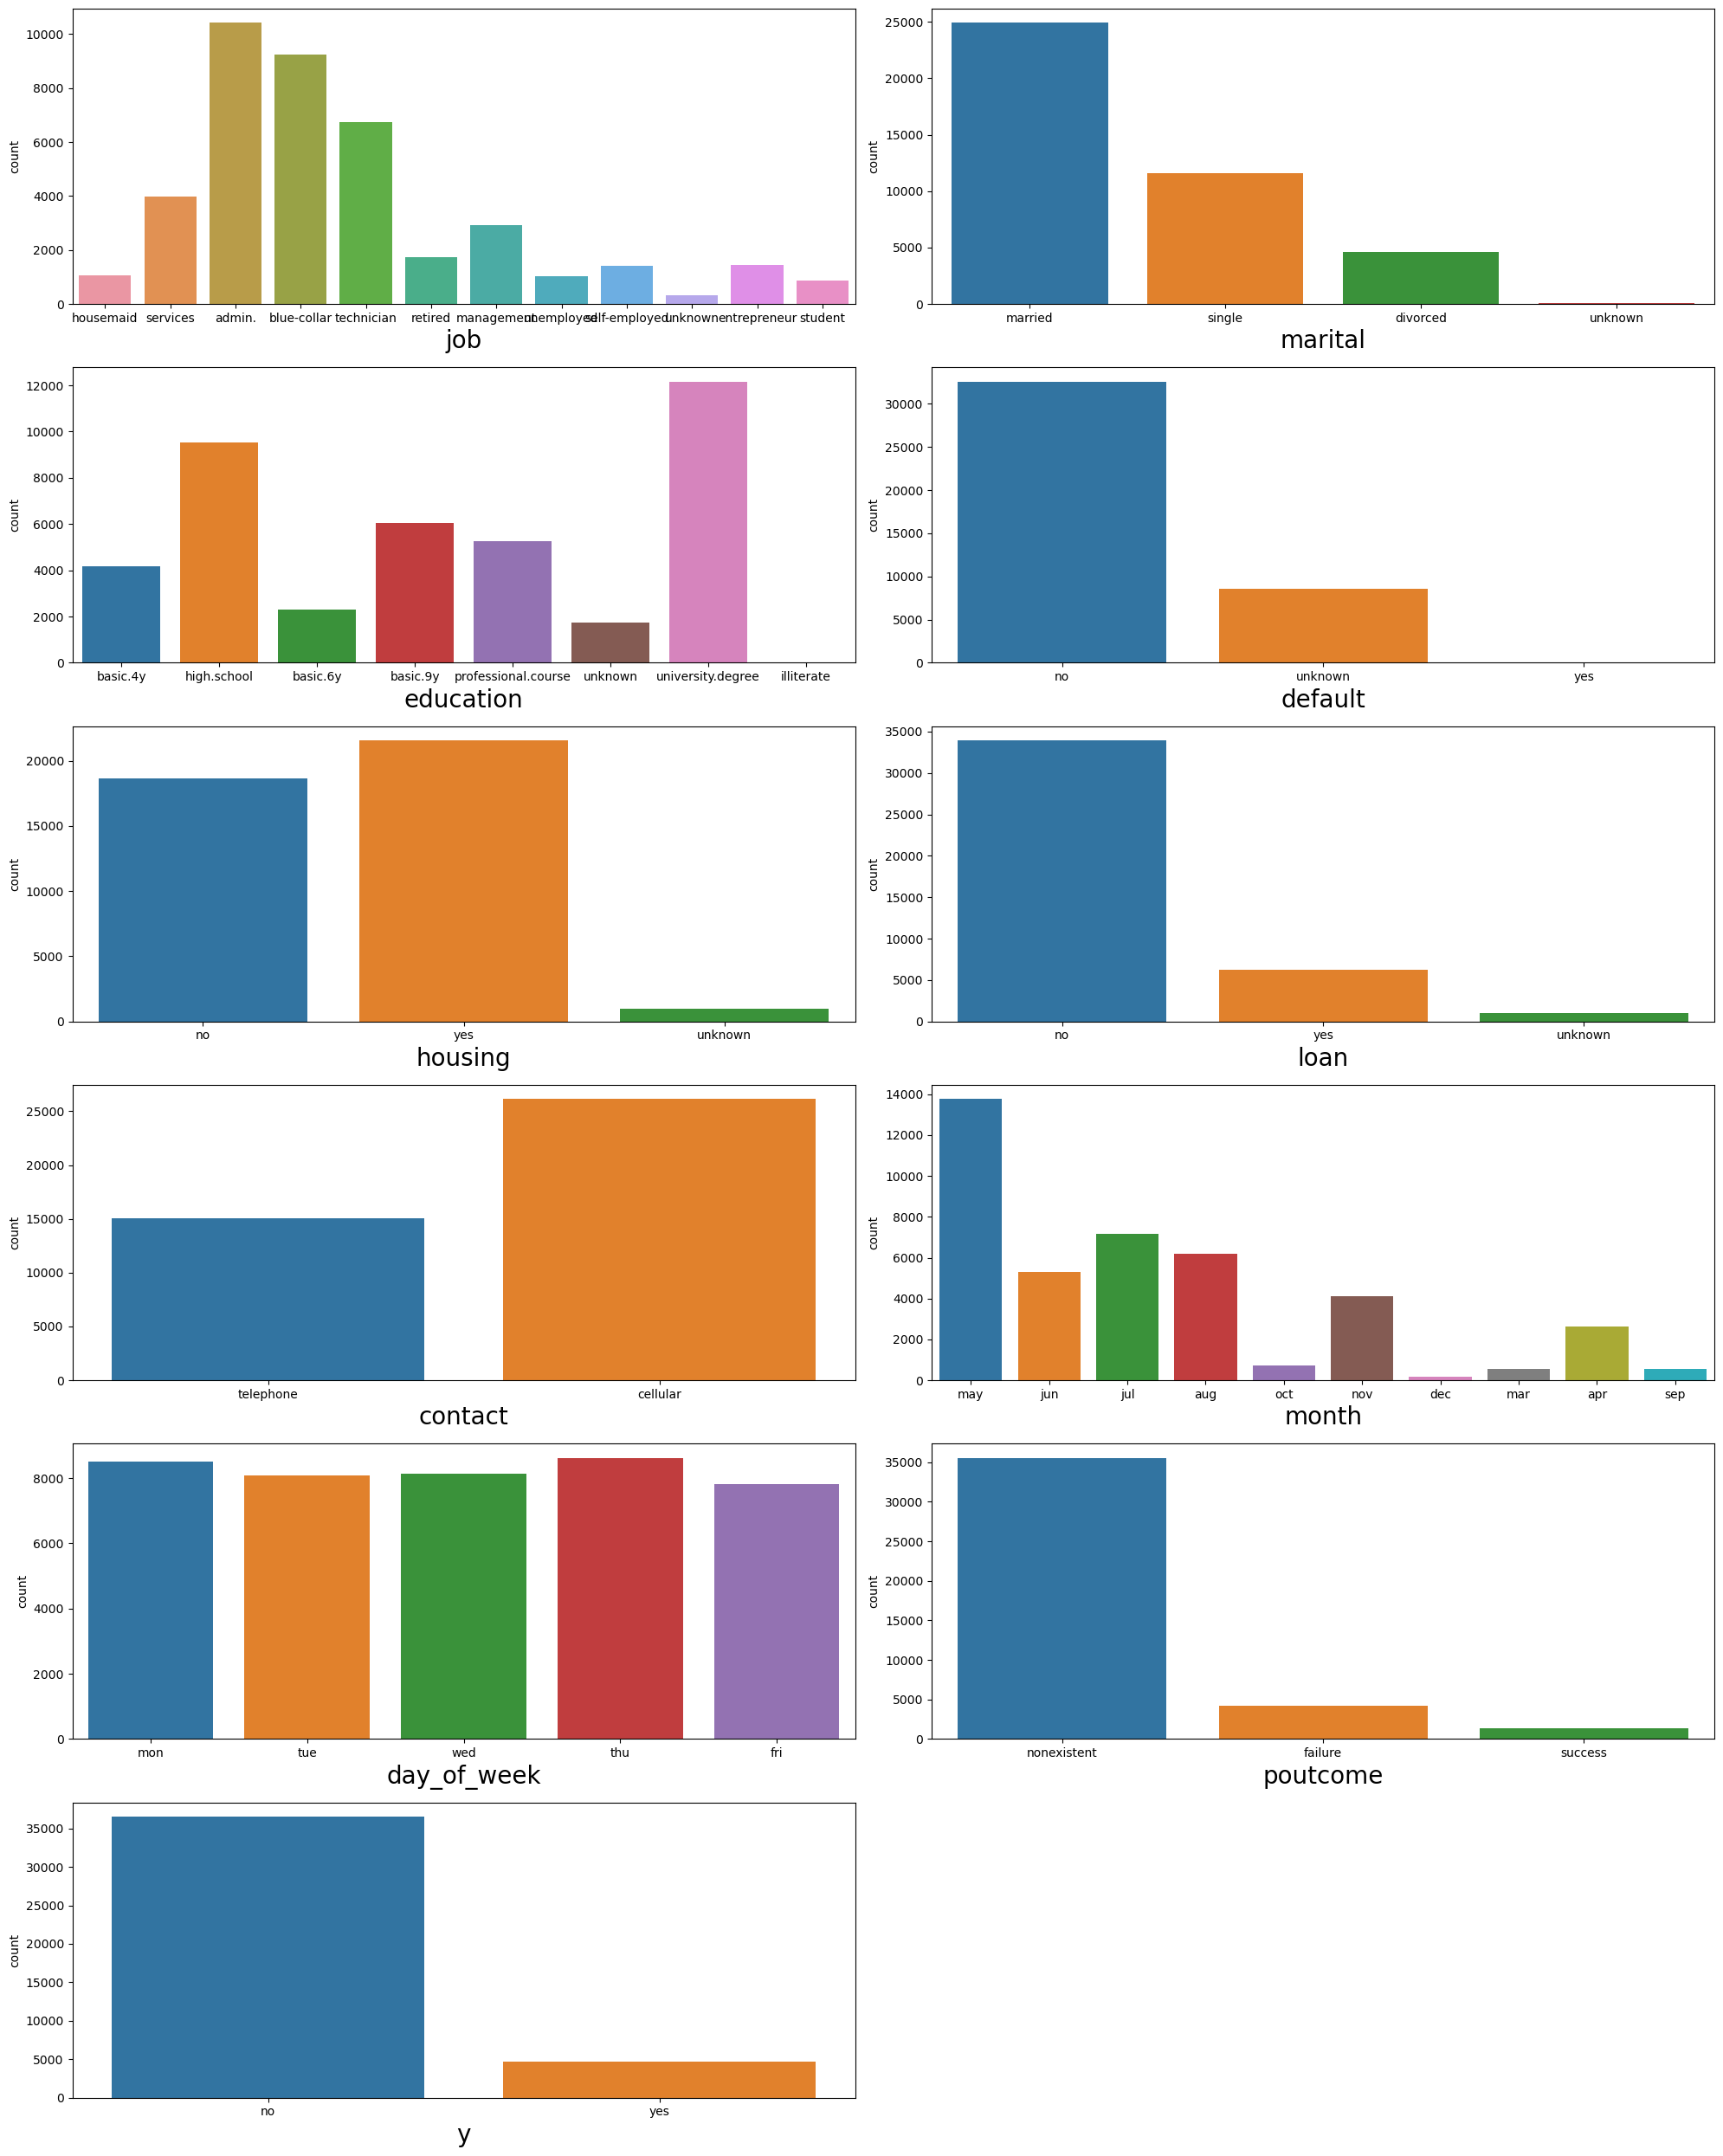

In [15]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in data_cat:
    if plotnumber<=16:
        ax = plt.subplot(6,2,plotnumber)
        sns.countplot(x=data_cat[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Insights from univariate analysis

**Numerical Features**
* Age : The age distribution is right-skewed, with most customers falling between 30-40 years old. A few older customers exist as outliers.
* Duration : The duration of the last contact call shows that longer calls tend to lead to better outcomes, though the majority of calls are short (less than 200 seconds).
* Campaign and Previous : Most customers have been contacted a limited number of times, and few customers have been contacted through multiple campaigns.

**Categorical Features**
* Job : Common jobs include "blue-collar", "management", and "technician", with "student" and "retired" customers having a higher likelihood of subscribing.
* Marital Status : Most customers are married, with a smaller proportion being single or divorced. Single customers are more likely to subscribe than married ones.
* Education : Most customers have secondary or tertiary education. Higher education correlates with a higher subscription rate.
* Housing : A large portion of customers have housing loans
* Default and Loan : People with no default and no loan more.
* Contact: People who have been contacted via cellular network are mo..e
* y(Target) : The classes no and yes are highly imbalanced with majority no values and very few positive cases.

## Bivariate Analysis

**Categorical Features VS Target**

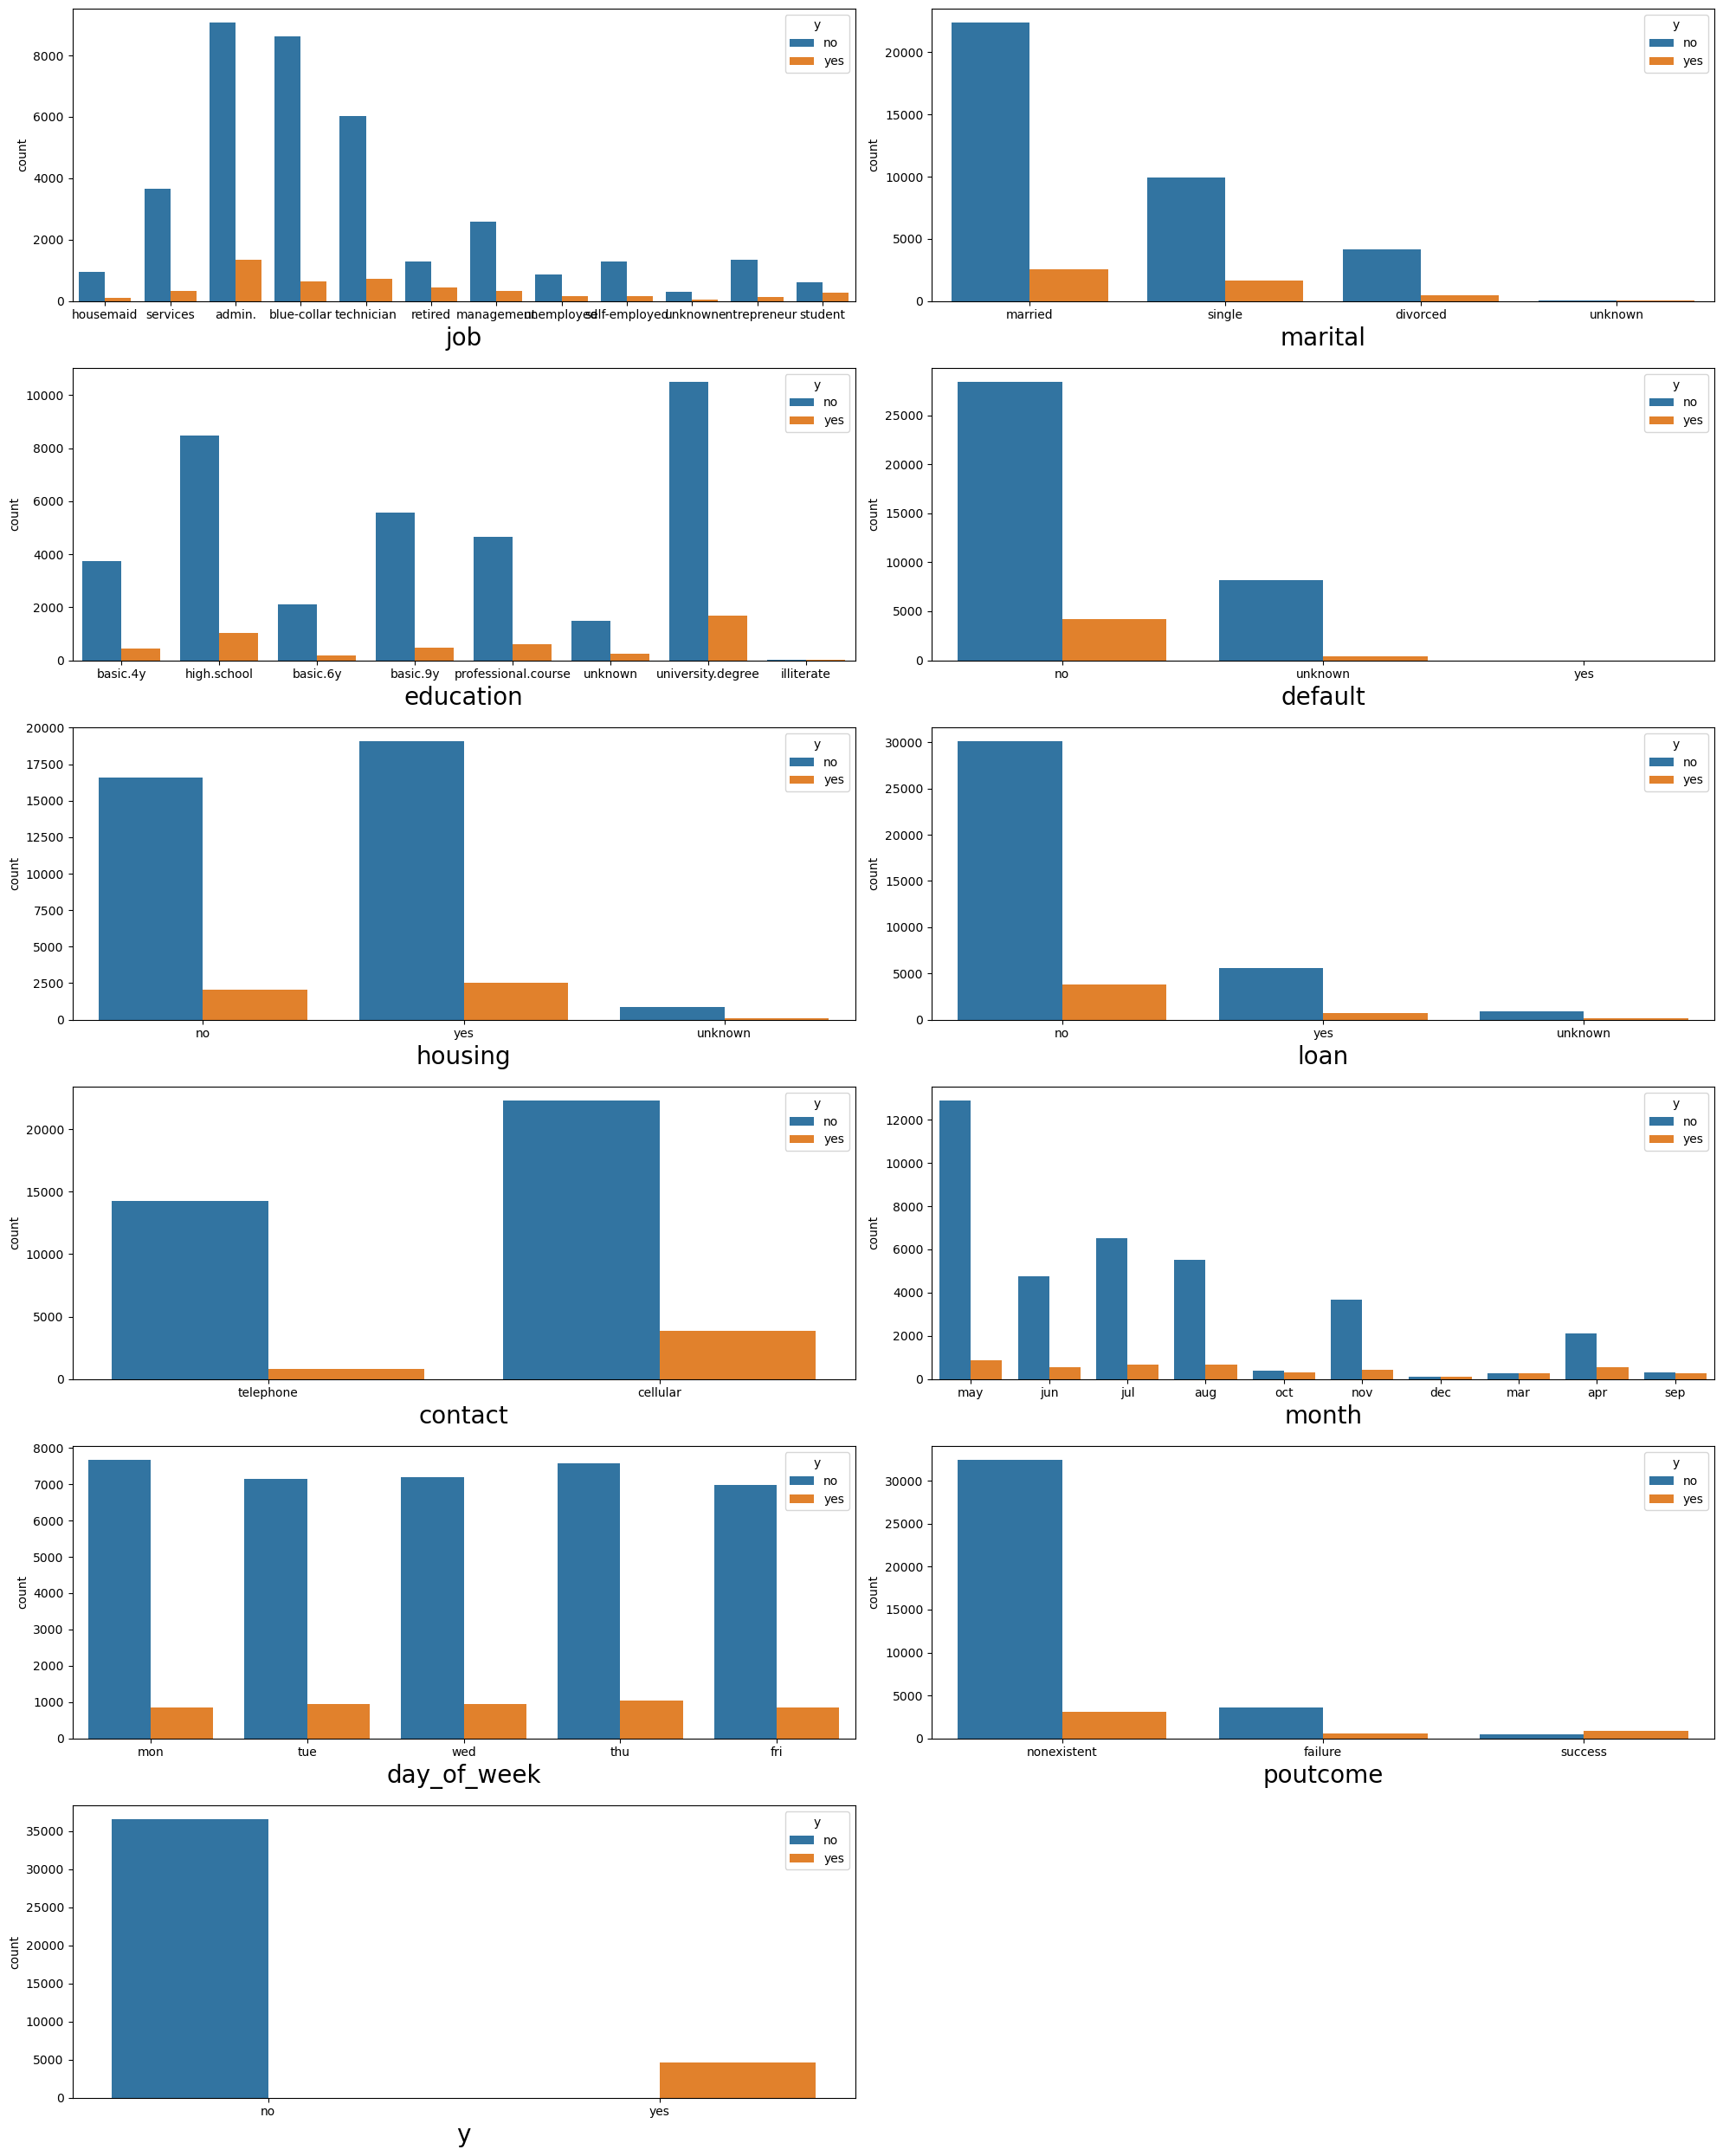

In [16]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in data_cat:
    if plotnumber<=16:
        ax = plt.subplot(6,2,plotnumber)
        sns.countplot(x=data_cat[column],hue=data_cat.y)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Numerical Features VS Target**

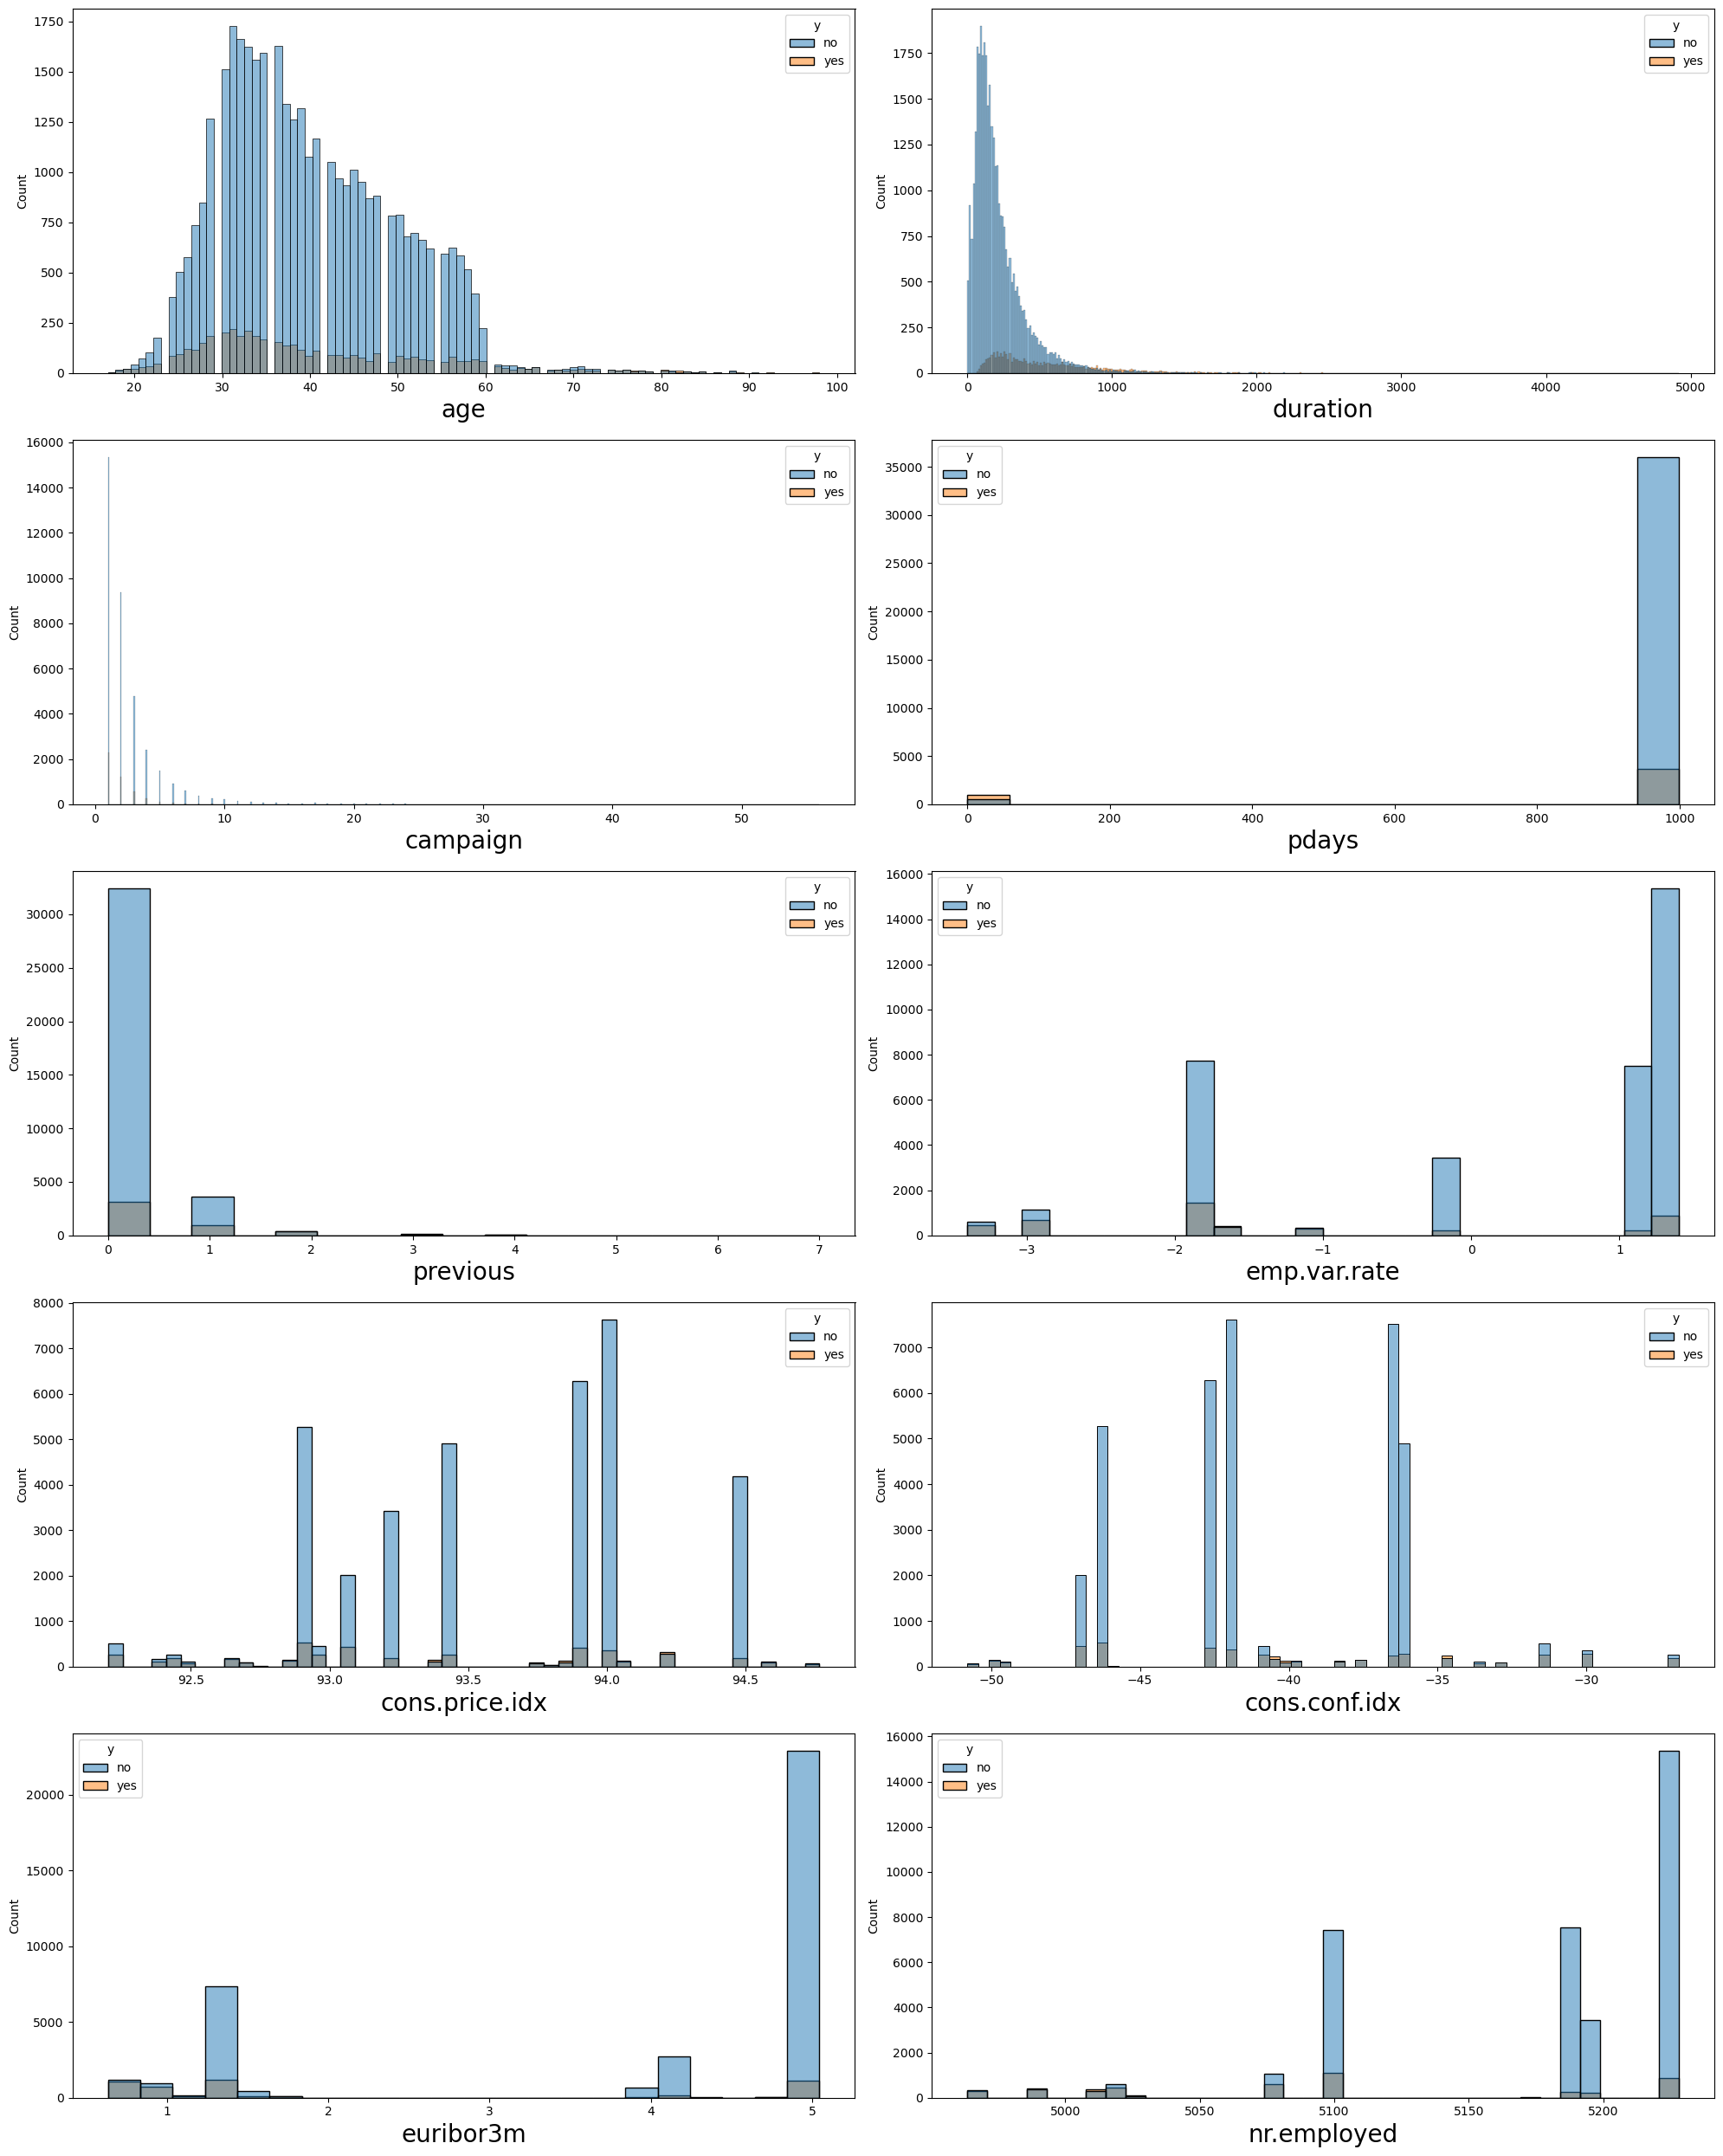

In [17]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in data_num:
    if plotnumber<=16:
        ax = plt.subplot(5,2,plotnumber)
        sns.histplot(x=data_num[column],hue=data_cat.y)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Insights from Bivariate Analysis
* Age vs Subscription: Older customers and younger ones (20-30) tend to subscribe more frequently than middle-aged customers (30-40), who have lower subscription rates.
* Job vs Subscription: Job types like "admin", "blue-collar", and "technician" have higher subscription rates, while other workers have lower subscription rates.
* Duration vs Subscription: Longer call durations are positively correlated with higher subscription rates. Calls lasting over 300 seconds (5 minutes) are more likely to result in a subscription.
* Campaign: The length of contact calls and previous campaign outcomes are strong predictors. Longer calls and successful prior campaigns boost the likelihood of a successful subscription.
* Education vs Subscription: Customers with higher levels of education (tertiary) tend to subscribe more frequently than those with lower levels of education (primary).
* Default and Loan vs Subscriptions : People without default and loans tend to subscribe more frequently.
Previous Campaign Outcome vs Subscription: If the customer had a successful outcome in the previous campaign, they are much more likely to subscribe again.
* Demographic Variables: Variables like age, job, and education are strong indicators of whether a customer will subscribe. Younger, highly educated customers with professional jobs are more likely to subscribe.

# Data Preprocessing

In [18]:
## Handling Missing Values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**There is no missing values, so we will continue with next steps**

In [19]:
## Duplicates
data.duplicated().sum()

12

In [20]:
## Dropping Duplicates
data.drop_duplicates(inplace=True)

## Outliers

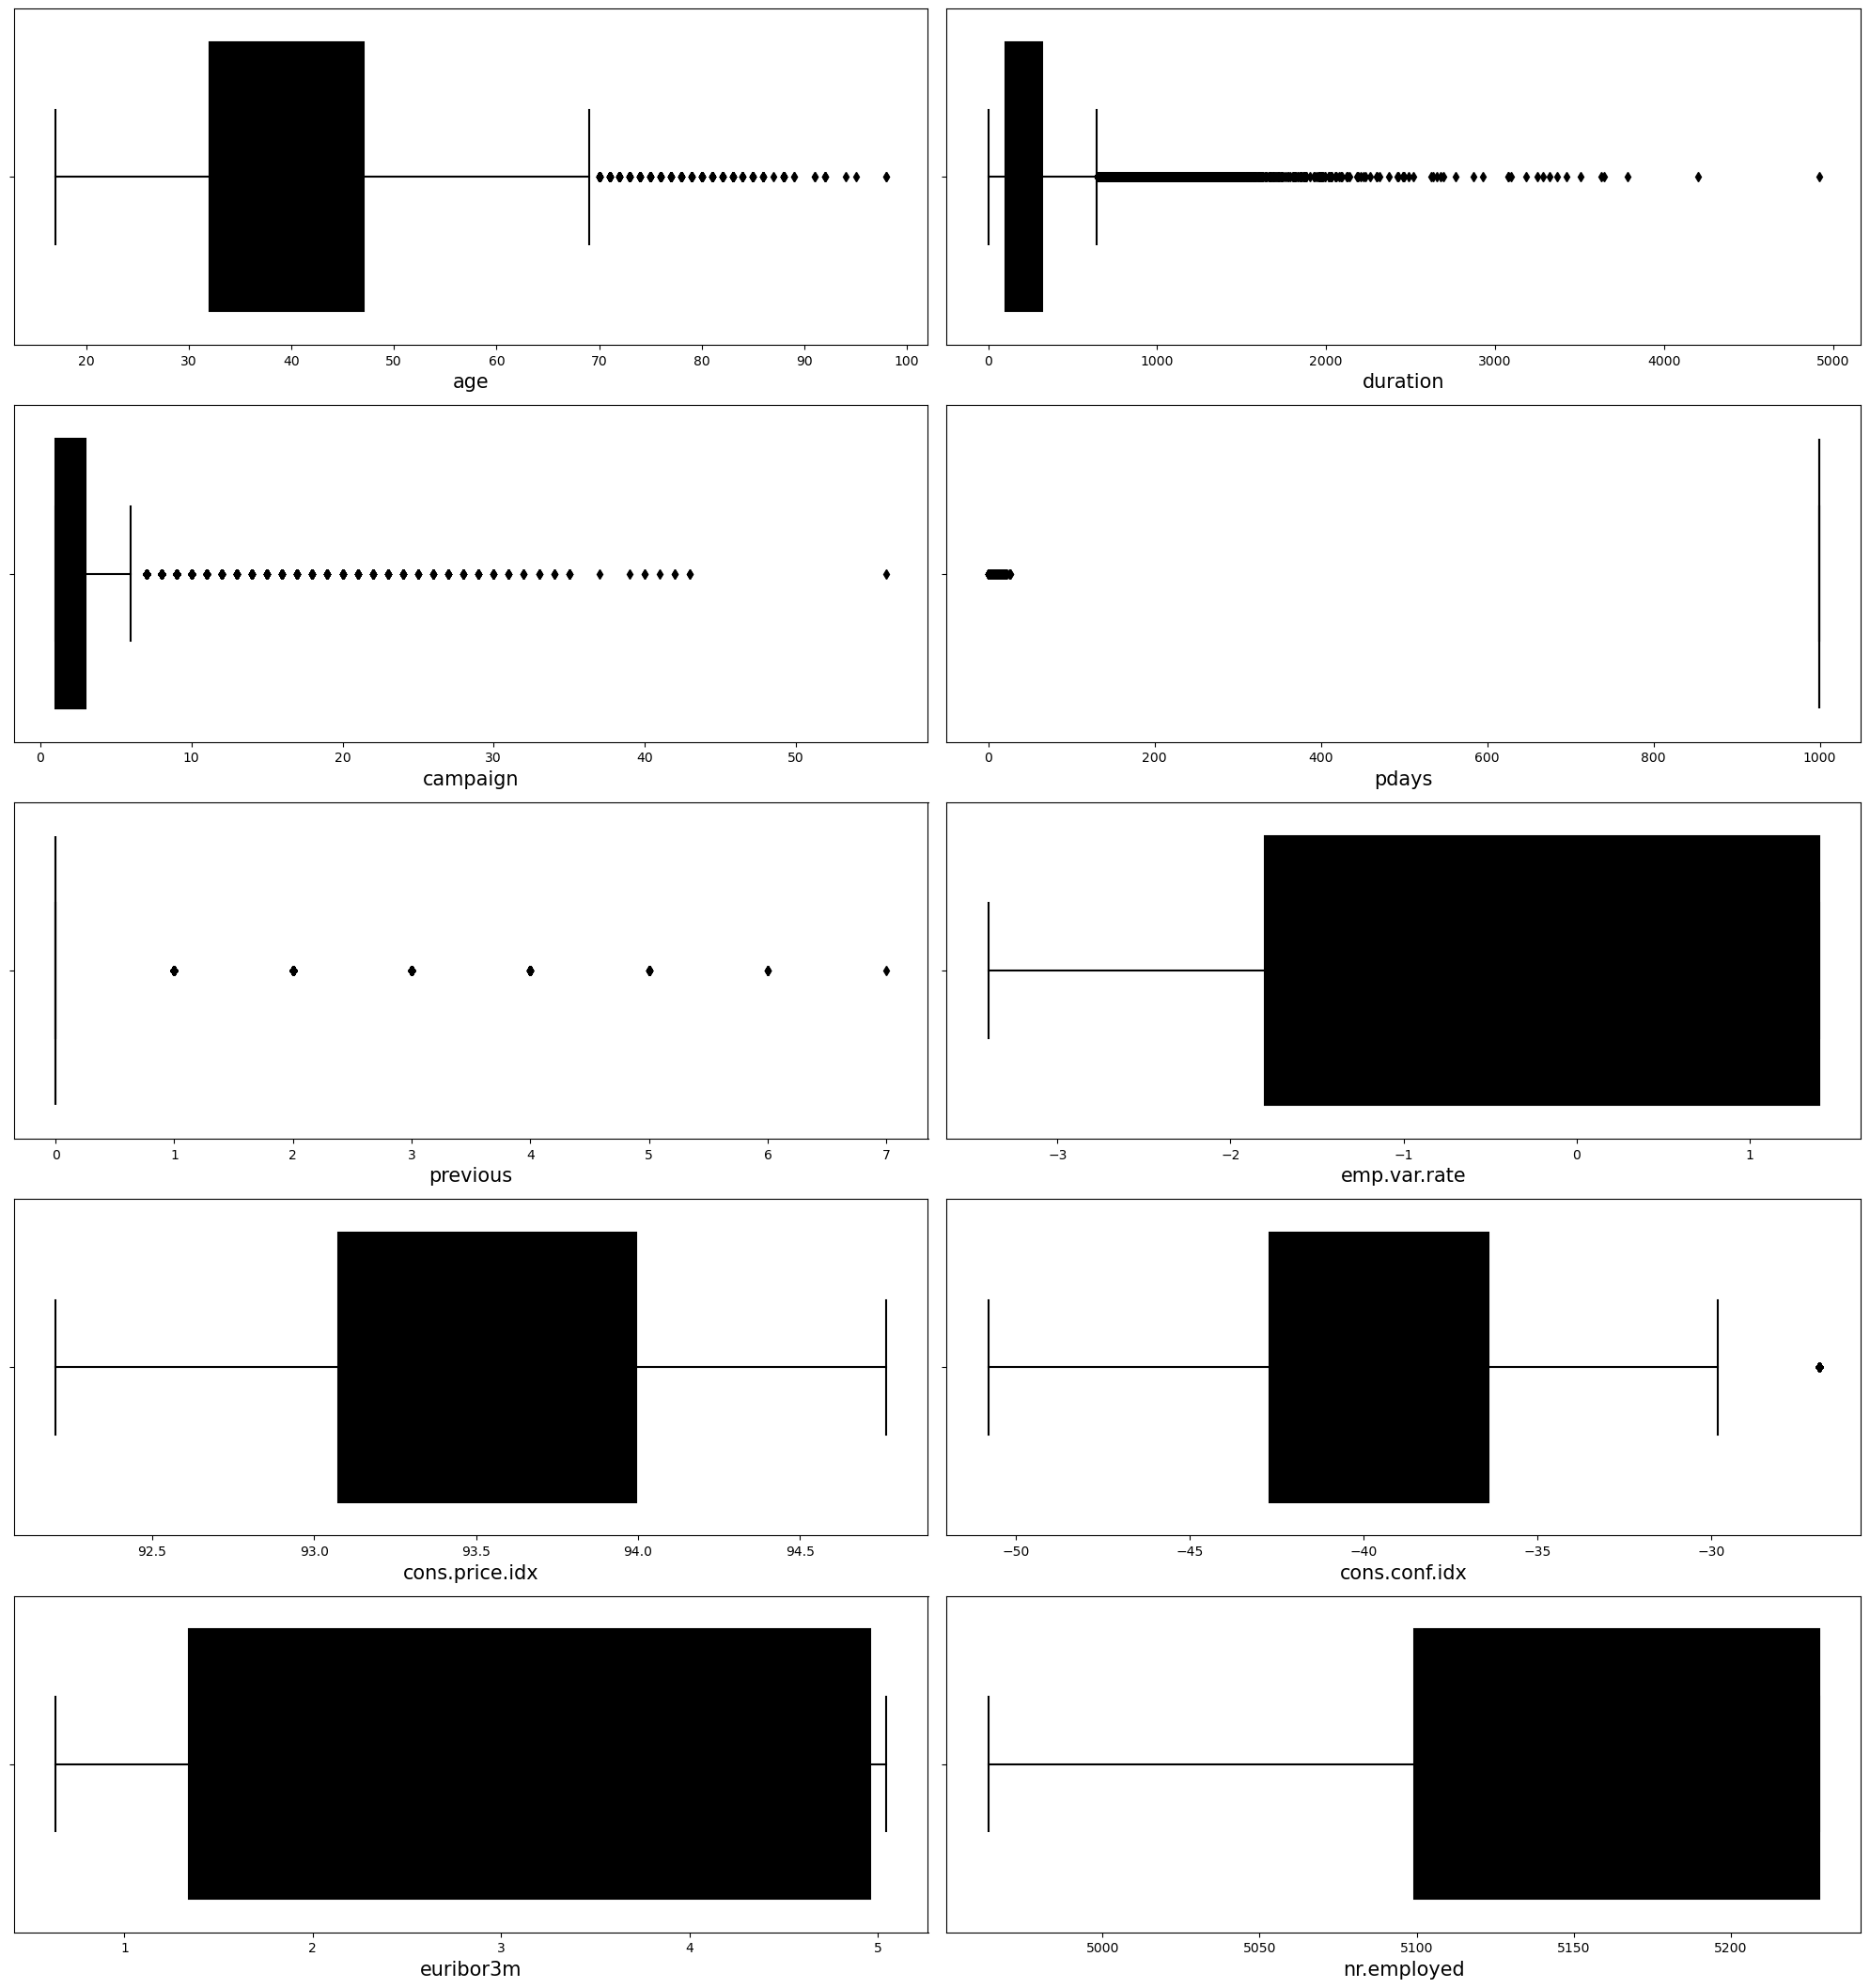

In [21]:
## Creating box plot to check the outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in data_num:
    if plotnumber<=16:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(x=data_num[column], color='k')
        plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.tight_layout()

**Outliers Treatment**

In [22]:
## Creating def function for outlier treatment
def Outliers_IQR(data,column):
    IQR = st.iqr(data[column],interpolation='midpoint')
    print(f'IQR: {IQR}')
    Q1 = data[column].quantile(0.25)
    print(f'The 25\u1d57\u02b0 percentile of {column} : {Q1}' )
    Q3 = data[column].quantile(0.75)
    print(f'The 75\u1d57\u02b0 percentile of {column} : {Q3}' )
    Upper_limit = Q3 + 1.5*IQR
    print(f'The Upper_limit of {column} : {Upper_limit}' )
    Lower_limit = Q1 - 1.5*IQR
    print(f'The Lower_limit of {column} : {Lower_limit}' )
    Lower_Out_data = data.loc[data[column]<Lower_limit]
    print(f'The Lower Outlier data of {column} : {len(Lower_Out_data)}')
    Upper_Out_data = data.loc[data[column]>Upper_limit]
    print(f'The Upper Outlier data of {column} : {len(Upper_Out_data)}')
    Outlier_Per = (2406/len(data))*100
    print(f'The Outlier percentage of {column} : {Outlier_Per}')

    

In [23]:
# Treating the extreme values of age feature
Outliers_IQR(data,'age')

IQR: 15.0
The 25ᵗʰ percentile of age : 32.0
The 75ᵗʰ percentile of age : 47.0
The Upper_limit of age : 69.5
The Lower_limit of age : 9.5
The Lower Outlier data of age : 0
The Upper Outlier data of age : 468
The Outlier percentage of age : 5.8432096366815625


**It doesn't make any sense for students under 18 years to open a bank term deposit or even get a housing or a personal loan. So removing these values.**

In [24]:
data[data['age']<18]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,432,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,182,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,92,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,498,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,896,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes


In [25]:
# Filtering the dataset to include only individuals who are 18 years old or older.
data=data[data['age']>=18]

In [26]:
# Treating the extreme values of age feature
Outliers_IQR(data,'campaign')

IQR: 2.0
The 25ᵗʰ percentile of campaign : 1.0
The 75ᵗʰ percentile of campaign : 3.0
The Upper_limit of campaign : 6.0
The Lower_limit of campaign : -2.0
The Lower Outlier data of campaign : 0
The Upper Outlier data of campaign : 2406
The Outlier percentage of campaign : 5.843919263559302


In [27]:
data.loc[data['campaign']>10,'campaign'].value_counts()[-6:]

campaign
42    2
43    2
37    1
41    1
39    1
56    1
Name: count, dtype: int64

**Observing the above data, lot of data lies after 75th percentile so it would make no sense to those values, it is significant from the box plot above as well.So we will just remove the extreme value 56.**

In [28]:
#Dropping the extreme value row in Campaign for filtering the dataset
data=data[data['campaign']<56]

# Encoding - Handling Categorical Data

In [29]:
data_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [30]:
## One hot encoding for Job, Martial, Contact, Month, Day_of_week, Poutcome as they does not follow any hierarchy or rank
data = pd.get_dummies(data=data,columns=['job','marital','contact','month','day_of_week','poutcome'], drop_first=True)

In [31]:
## Label encoding for Education, Default, Housing, Loan
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['education'] = labelencoder.fit_transform(data['education'])
data['default'] = labelencoder.fit_transform(data['default'])
data['housing'] = labelencoder.fit_transform(data['housing'])
data['loan'] = labelencoder.fit_transform(data['loan'])

In [32]:
## Manual Encoding for dependent variable y
data.replace({'yes':1, 'no':0}, inplace=True)

In [33]:
data

,age,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0,0,0,0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
1,57,3,1,0,0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
2,37,3,0,2,0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
3,40,1,0,0,0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
4,56,3,0,0,2,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,2,0,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
41184,46,5,0,0,0,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
41185,56,6,0,2,0,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
41186,44,5,0,0,0,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False


# Feature Selection

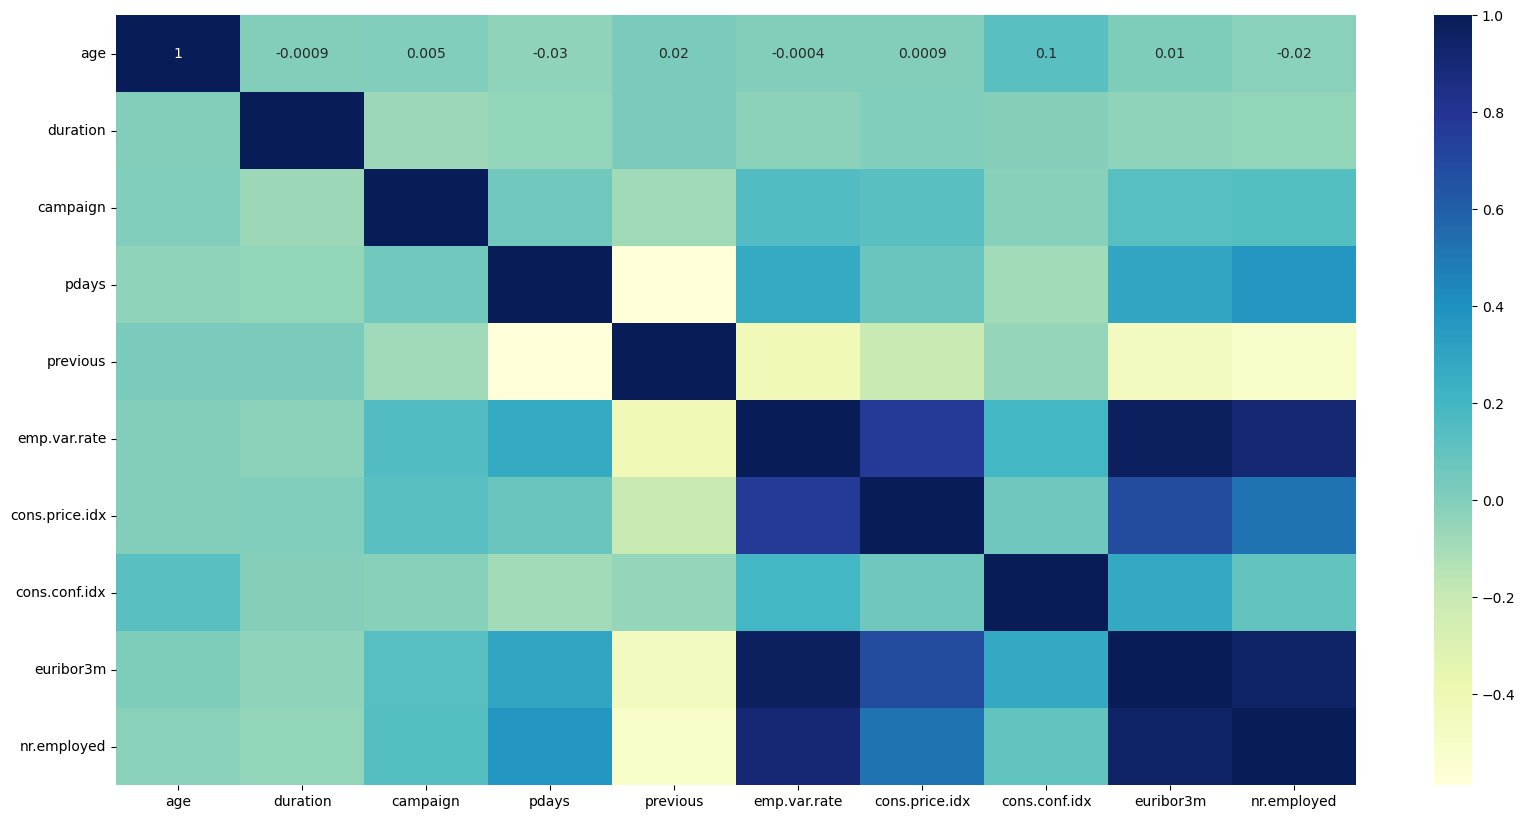

In [34]:
## Checking correlation
plt.figure(figsize=(20,10))
sns.heatmap(data_num.corr(),annot=True,fmt='.1g',xticklabels=data_num.columns.values,yticklabels=data_num.columns.values,cmap="YlGnBu",cbar=True)
plt.show()


**As the duration feature highly affects the output target. Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known, so this input only used for benchmark purposes and will be dropped.**

In [35]:
## Dropping Duration column
data.drop('duration', axis=1, inplace=True)

In [36]:
data

,age,education,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0,0,0,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
1,57,3,1,0,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
2,37,3,0,2,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
3,40,1,0,0,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
4,56,3,0,0,2,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,2,0,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
41184,46,5,0,0,0,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
41185,56,6,0,2,0,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
41186,44,5,0,0,0,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False


In [37]:
## Final data
Final_data=data.copy()

# Model Creation

In [38]:
## Assigning Independent and Dependent Variable
X=data.drop('y', axis=1)
y=data['y']

In [39]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41170, dtype: int64

In [40]:
## Splitting training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=10)

In [41]:
## Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [42]:
X_train[['age','campaign','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]=scaler.fit_transform(X_train[['age','campaign','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']])
X_test[['age','campaign','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]=scaler.transform(X_test[['age','campaign','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']])

In [43]:
## Smote - Balancing data
from imblearn.over_sampling import SMOTE
smote = SMOTE() ## object creation

In [44]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [45]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({0: 25522, 1: 3297})
SMOTE Classes Counter({0: 25522, 1: 25522})


# Model Building 

In [46]:
## Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, recall_score

In [47]:
def predict(Class_Model): ## Defining a function
    print(f'IMBALANCE DATA') 
    print(f'Model Name : {Class_Model}') ## Object Creation
    model = Class_Model.fit(X_train, y_train) ## Training the data
    print(f'Training score : {model.score(X_train,y_train)}') ## Training data score
    y_predict = model.predict(X_test) ## Predicting test data
    print(f' Predictions are : {y_predict}') ## Predicted data
    print('\n')
    print(f'MODEL EVALUATION')
    conf_matrix= confusion_matrix(y_test, y_predict)
    print(f'confusion matrix')
    print(conf_matrix)
    print(f'Classification Report')
    print(classification_report(y_test,y_predict))
    print(f'f1_score: {f1_score(y_test,y_predict)}')
    print('\n')
    print(f'SMOTE DATA')
    print(f'Model Name : {Class_Model}')
    model = Class_Model.fit(X_train_smote, y_train_smote)
    print(f'Training score : {model.score(X_train_smote, y_train_smote)}')
    y_predict_Smote = model.predict(X_test)
    print(f' Predictions are : {y_predict_Smote}')
    print('\n')
    print(f'MODEL EVALUATION')
    conf_matrix= confusion_matrix(y_test, y_predict_Smote)
    print(f'Confusion matrix')
    print(conf_matrix)
    print(f'Classification Report')
    print(classification_report(y_test,y_predict_Smote))
    print(f'f1_score: {f1_score(y_test,y_predict_Smote)}')

In [48]:
## Logistic Regression
predict(LogisticRegression())

IMBALANCE DATA
Model Name : LogisticRegression()
Training score : 0.8994413407821229
 Predictions are : [0 0 0 ... 0 0 0]


MODEL EVALUATION
confusion matrix
[[10854   157]
 [ 1025   315]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     11011
           1       0.67      0.24      0.35      1340

    accuracy                           0.90     12351
   macro avg       0.79      0.61      0.65     12351
weighted avg       0.89      0.90      0.88     12351

f1_score: 0.347682119205298


SMOTE DATA
Model Name : LogisticRegression()
Training score : 0.7805226863098503
 Predictions are : [0 1 0 ... 0 0 0]


MODEL EVALUATION
Confusion matrix
[[9328 1683]
 [ 568  772]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.85      0.89     11011
           1       0.31      0.58      0.41      1340

    accuracy                           0.82     12351
   macro av

In [49]:
## Support Vector Classifier
predict(SVC())

IMBALANCE DATA
Model Name : SVC()
Training score : 0.896595995697283
 Predictions are : [0 0 0 ... 0 0 0]


MODEL EVALUATION
confusion matrix
[[10861   150]
 [ 1067   273]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     11011
           1       0.65      0.20      0.31      1340

    accuracy                           0.90     12351
   macro avg       0.78      0.60      0.63     12351
weighted avg       0.88      0.90      0.88     12351

f1_score: 0.3096993760635281


SMOTE DATA
Model Name : SVC()
Training score : 0.8063239558028368
 Predictions are : [0 0 0 ... 0 0 0]


MODEL EVALUATION
Confusion matrix
[[9505 1506]
 [ 552  788]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     11011
           1       0.34      0.59      0.43      1340

    accuracy                           0.83     12351
   macro avg       0.64      0.73      0.

In [50]:
## Decision Tree Classifier
predict(DecisionTreeClassifier())

IMBALANCE DATA
Model Name : DecisionTreeClassifier()
Training score : 0.9961830736666782
 Predictions are : [0 0 0 ... 0 0 0]


MODEL EVALUATION
confusion matrix
[[9926 1085]
 [ 897  443]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     11011
           1       0.29      0.33      0.31      1340

    accuracy                           0.84     12351
   macro avg       0.60      0.62      0.61     12351
weighted avg       0.85      0.84      0.84     12351

f1_score: 0.30892608089260815


SMOTE DATA
Model Name : DecisionTreeClassifier()
Training score : 0.9978449964736306
 Predictions are : [0 1 0 ... 0 0 0]


MODEL EVALUATION
Confusion matrix
[[9896 1115]
 [ 841  499]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     11011
           1       0.31      0.37      0.34      1340

    accuracy                           0.84     12351
   ma

In [51]:
## Random Forest Classifier
predict(RandomForestClassifier())

IMBALANCE DATA
Model Name : RandomForestClassifier()
Training score : 0.9961483743363753
 Predictions are : [0 0 0 ... 0 0 0]


MODEL EVALUATION
confusion matrix
[[10641   370]
 [  932   408]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11011
           1       0.52      0.30      0.39      1340

    accuracy                           0.89     12351
   macro avg       0.72      0.64      0.66     12351
weighted avg       0.88      0.89      0.88     12351

f1_score: 0.3852691218130312


SMOTE DATA
Model Name : RandomForestClassifier()
Training score : 0.9978254055324818
 Predictions are : [0 0 0 ... 0 0 0]


MODEL EVALUATION
Confusion matrix
[[10392   619]
 [  817   523]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11011
           1       0.46      0.39      0.42      1340

    accuracy                           0.88     1235

In [52]:
## Bagging Classifier
predict(BaggingClassifier())

IMBALANCE DATA
Model Name : BaggingClassifier()
Training score : 0.9827544328394462
 Predictions are : [0 0 0 ... 0 0 0]


MODEL EVALUATION
confusion matrix
[[10581   430]
 [  937   403]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11011
           1       0.48      0.30      0.37      1340

    accuracy                           0.89     12351
   macro avg       0.70      0.63      0.66     12351
weighted avg       0.87      0.89      0.88     12351

f1_score: 0.37091578462954444


SMOTE DATA
Model Name : BaggingClassifier()
Training score : 0.9921636235404749
 Predictions are : [0 0 0 ... 0 0 0]


MODEL EVALUATION
Confusion matrix
[[10447   564]
 [  881   459]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     11011
           1       0.45      0.34      0.39      1340

    accuracy                           0.88     12351
   macr

In [53]:
## Gradient Boosting Classifier
predict(GradientBoostingClassifier())

IMBALANCE DATA
Model Name : GradientBoostingClassifier()
Training score : 0.9043339463548353
 Predictions are : [0 0 0 ... 0 0 0]


MODEL EVALUATION
confusion matrix
[[10837   174]
 [ 1015   325]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11011
           1       0.65      0.24      0.35      1340

    accuracy                           0.90     12351
   macro avg       0.78      0.61      0.65     12351
weighted avg       0.89      0.90      0.88     12351

f1_score: 0.35345296356715605


SMOTE DATA
Model Name : GradientBoostingClassifier()
Training score : 0.8784186192304678
 Predictions are : [0 0 0 ... 0 0 0]


MODEL EVALUATION
Confusion matrix
[[10090   921]
 [  614   726]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     11011
           1       0.44      0.54      0.49      1340

    accuracy                           0.88

In [54]:
Models=[]
Models.append(('LR',LogisticRegression()))
Models.append(('SVM',SVC()))
Models.append(('DT',DecisionTreeClassifier()))
Models.append(('RF',RandomForestClassifier()))
Models.append(('BC',BaggingClassifier()))
Models.append(('GB',GradientBoostingClassifier()))
Models

[('LR', LogisticRegression()),
 ('SVM', SVC()),
 ('DT', DecisionTreeClassifier()),
 ('RF', RandomForestClassifier()),
 ('BC', BaggingClassifier()),
 ('GB', GradientBoostingClassifier())]

In [55]:
## Checking Cross validation scores
from sklearn.model_selection import KFold, cross_val_score
my_cv = []
my_names = []

for name, model in Models:
    cv = cross_val_score(model,X_train_smote,y_train_smote,cv=10,scoring='f1')
    my_names.append(name)
    my_cv.append(cv)
    scores = ('%s %f (%f)' % (name, cv.mean(), cv.std()))
    print(scores)

LR 0.762030 (0.040066)
SVM 0.785912 (0.037635)
DT 0.887447 (0.116368)
RF 0.928975 (0.082540)
BC 0.911247 (0.127748)
GB 0.862875 (0.088145)


In [56]:
# Hyperparameter Tuning

After creating multiple classification models, both RandomForest and GradientBoosting performed well in their base models, so we will tune both the models with different Hyperparameters.

**Hyperparameter tuning for RandomForest**

In [57]:
## Importing randomizedsearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
## Creating dictionary for Parameters
param_distributions = {
    'n_estimators': [100,120,150,180,200,240],
    'max_depth': [5,10,15,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[2,4,6,12,15,20],
    'max_features':['sqrt','log2'],
    'criterion': ['gini', 'entropy'],'bootstrap': [True, False]  
}
# Initialize the model
rf = RandomForestClassifier()

# RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=100, scoring='f1', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train_smote, y_train_smote)

# Best hyperparameters
print("Best Parameters:", random_search.best_params_)

In [ ]:
predict(RandomForestClassifier(n_estimators=100, min_samples_split=5,min_samples_leaf=2,max_depth=20,max_features='sqrt',bootstrap=False,random_state=42,criterion='entropy'))

In [ ]:
**Hyperparameter tuning for GradientBoosting**

In [ ]:
## Creating dictionary for Parameters
param_distributions = {
    'n_estimators': [100,120,150,180,200,240],
    'max_depth': [5,10,15,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[2,4,6,12,15,20],
    'max_features':['sqrt','log2'],
    'loss':['log_loss','exponential'],
    'learning_rate':[0.1,0.001,0.0001,0.02],
    'criterion':['friedman_mse','squared_error']
}
# Initialize the model
GB = GradientBoostingClassifier()

# RandomizedSearchCV
random_search = RandomizedSearchCV(GB, param_distributions, n_iter=50, scoring='f1', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train_smote, y_train_smote)

# Best hyperparameters
print("Best Parameters:", random_search.best_params_)

In [ ]:
predict(GradientBoostingClassifier(n_estimators=120, min_samples_split=10,min_samples_leaf=2,max_depth=20,learning_rate=0.1,max_features='log2',loss='log_loss',criterion='friedman_mse'))

## Applying Recursive Feature Elimination(RFE) with cross-fold evaluation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.feature_selection import RFE

In [ ]:
## Creating def function for elimination_crossval
def elimination_crossval(model):

    rfe=RFE(estimator=RandomForestClassifier(),n_features_to_select=10)
    
    #Fitting the rfe
    X_rfe=rfe.fit_transform(X_train_smote,y_train_smote)
    
    #Transforming X_test
    X_rfe_test=rfe.transform(X_test)
    
    model=model
    
    #Creating pipeling to avoid data leakage
    pipeline=Pipeline(steps=[('s',rfe),('m',model)])
    
    cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

    scores =cross_val_score(pipeline,X_rfe, y_train_smote, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy for model with cross val: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))
    
    
    #Fitting the pipeline
    fitted_model=pipeline.fit(X_rfe,y_train_smote)
    
    y_preds=fitted_model.predict(X_rfe_test)
    
    #Printing the classification report
    print(classification_report(y_test,y_preds))

In [ ]:
elimination_crossval(LogisticRegression(max_iter=7600))

In [ ]:
elimination_crossval(GradientBoostingClassifier())

## **Data Analysis Report**

#### **1. Introduction**
 
   The purpose of the analysis is to how the bank runs a marketing campaign to bring customers on board with the term deposits.


#### **2. Data Overview**

 - Number of rows: 41188
 - Number of columns: 21
 -  Featues: Age, Duration, Campaign, Pdays, Previous, Emp.var.rate, Cons.price.idx, Cons.conf.idx, Euribor3m, Nr.employed, Job, Martial, Education, Default, Housing, Loan, Contact, Month, Day_of_week, Poutcome, y(Target.))
 - Target Variable : y(Bank Term Deposit Subrcription).
#### **3. Data Preprocessing and Feature Engineering**
   
- **Handling Missing Values** : The dataset contains no missing values, ensuring data completeness and consistenc.
 - **Handling categorical data** : For the categorical features like Job, Marital, Education, Default, Housing, Loan, Contact, Month, Day_of_week, Poutcome, and y (Target) in the Portuguese bank data, a combination of one-hot encoding and label encoding was applied based on real-world hierarchies and domain understanding. One-hot encoding was used for features without inherent order, such as Job, Martial, Contact, Month, Day_of_week, Poutcome. Meanwhile, label encoding was applied to ordinal features like Education and Default, Housing and Loan, reflecting their natural ranking to improve model interpretability and performance. And for target variable(y) manual encoding was done. This balanced approach captures both nominal and ordinal relationships effectively
 - **Outliers** : Handling outliers was crucial for improving model accuracy, but in some cases, extreme values might represent valid customer behaviors, so after careful analysis. The data includes records of students under 18, which is unrealistic for opening a bank term deposit or obtaining loans like housing or personal loans. Therefore, removing these values is a logical step to ensure data relevance and accuracy. In the Campaign feature lot of data lies after 75th percentile so it would make no sense to those values, it is significant from the box plot above as well. So we removed the extreme value 56
- **Feature Transformation**:  MinMax scaling was applied to the features Age, Campaign, Pdays, Emp.var.rate, Cons.price.idx, Cons.conf.idx, Euribor3m, and Nr.employed because the data was not normally distributed, making standard scaling less appropriate. By using MinMaxScaler, the features were scaled to a range of 0 to 1, preserving the original distribution of the data while normalizing the feature values. This ensures that no feature disproportionately influences the model due to diffrent scales.

#### **4. Exploratory Data Analysis (EDA)**

- **Age vs Subscription**: Older customers and younger ones (20-30) tend to subscribe more frequently than middle-aged customers (30-40), who have lower subscription rates.
- **Job vs Subscription**: Job types like "admin", "blue-collar", and "technician" have higher subscription rates, while other workers have lower subscription rates.
- **Duration vs Subscription**: Longer call durations are positively correlated with higher subscription rates. Calls lasting over 300 seconds (5 minutes) are more likely to result in a subscription.
- **Education vs Subscription**: Customers with higher levels of education (tertiary) tend to subscribe more frequently than those with lower levels of education (primary).
- **Previous Campaign Outcome vs Subscription**: If the customer had a successful outcome in the previous campaign, they are much more likely to subscribe again.
- **Default and loan vs Subscription**: People without loans tend to subscribe more frequently.
- **Demographic Variables**: Variables like age, job, and education are strong indicators of whether a customer will subscribe. Younger, highly educated customers with professional jobs are more likely to subscribe..

In [ ]:
## **Overview of Models Evaluated**

In [ ]:
#### Logistic Regression

Performance Metrics:
- Accuracy Score: 0.81
- Precision: 0.30
- Recall: 0.58
- F1 Score: 0.39
  
#### Support Vector Classifier (SVC)

Performance Metrics:
- Accuracy Score: 0.83
- Precision: 0.34
- Recall: 0.59
- F1 Score: 0.43

#### Decision Tree Classifier

Performance Metrics:
- Accuracy Score: 0.84
- Precision: 0.30
- Recall: 0.37
- F1 Score: 0.33

#### Random Forest Classifier

Performance Metrics:
- Accuracy Score: 0.88
- Precision: 0.46
- Recall: 0.40
- F1 Score: 0.42

#### Bagging Classifier:

Performance Metrics:
- Accuracy Score: 0.88
- Precision: 0.44
- Recall: 0.34
- F1 Score: 0.38


#### Gradient Boosting Classifier: 

Performance Metrics:
- Accuracy Score: 0.88
- Precision: 0.44
- Recall: 0.53
- F1 Score: 0.48

## Model Performance Comparison

#### Best Model: 

After creating multiple classification models, Both RandomForest and GradientBoosting performed well in their base models, achieved overall scores as below.

1.RandomForest Classifier:
- Precision (Class 1): 0.46
- Recall (Class 1): 0.40
- Accuracy: 0.88
- F1 Score: 0.42
 
2.GradietBoosting Classifier:
- Precision (Class 1): 0.53
- Recall (Class 1): 0.44
- Accuracy: 0.88
- F1 Score: 0.48


## **Model Tuning Summary**

The primary goal of model tuning was to enhance the performance of the Random Forest (RF) and Gradient Boosting (GB) models, particularly focusing on improving recall for the minority class (customers likely to subscribe to term deposits).

**Tuning Process**

In this tuning process, RandomForest and GradientBoosting classifiers were subjected to hyperparameter tuning in an effort to improve the model's performance, particularly for the minority class (class 1). Despite tuning, the recall scores for class 1 (indicating the model's ability to correctly identify positive instances) showed little to moderate improvement in both models. For RandomForest, recall slightly increased from 40% to 43%, and for GradientBoosting, recall decreased from 53% to 37% as boosting focuses on best balance between precision, recall and overall performance

To further improve the results, Recursive Feature Elimination (RFE) was applied to Logistic Regression, Gradient boosting where the goal was to enhance the recall for class 1. This method yielded a significant improvement, achieving a recall of 70% for class 1 in Logistic Regression although at the cost of some accuracy in the overall classification.

**Conclusion**

The tuning efforts for RandomForest and GradientBoosting provided marginal improvements in recall for class 1, but they still struggled to correctly predict the minority class. By switching to Logistic Regression combined with Recursive Feature Elimination (RFE), a much better recall was achieved for class 1, improving from 58% to 70% and accuracy of 75. This suggests that RFE with Logistic Regression can be a more effective approach when the primary objective is to improve recall for the minority class, especially in imbalanced dataset.

## **Suggestions to the Bank market team to make customers buy the product.**

The most important features which the bank should focus on to attract more customers to buy term deposit are:
- Duration
- Age
- Campaign
- Euribo3
- nr.employed


1.Duration being one of the most influential factors,i.e. the higher the call duration the higher the chances of a sale. So the bank should focus on enhancing the quality of calls by building a rapport with the customers, decreasing wait time, checking in with the customers, and most importantly take feedback from the customers.

2.Age feature demonstrates that the majority term deposit purchasing capacity lies within the age group of 25-58 yrs adults. So, the bank should target this age group more and allocate more resources in getting in the customers from this particular ag

3.Campaign feature is important as it indicates the number of calls made during the current campaign. The customers do not like to get bothered with too many calls so a sweet spot lies within 1-5 calls, again depending upon the interest of the customer. So the bank should focus on training the sales team so that they can know the interested and non-interested customers based on the behavior,voice modulations, tone, and pitch of the customer.

4.Euribo3 is indicative of the trend that the higher interest rates attract more customers. So there are two things which the bank can pursue which are as follows: -Target the age group which is liable to get higher interest rates (4.5-5) particularly. -Increase the marketing campaign when the interest rates are higher, which can help in bringing more clients on board with the term deposits.

5.nr.employed trend indicates that more number of employees leads to more number of customers, which makes sense because if there are more employees, more leads can be targeted, proper followups and check-ins can be done. On the other hand, customer satisfaction could be achieved by creating a dedicated after-sales team. So, the bank should focus on hiring more people.e group.

## **Report on Challenges faced**

**1.Imbalanced Dataset**:

- Challenges : The dataset exhibited significant class imbalance, with a predominant number of 'No' responses compared to 'Yes' for term deposits. This imbalance led to models that performed well on accuracy but failed to adequately predict the minority class.
- Solution : Implementing oversampling techniques like SMOTE effectively balanced the classes, allowing for improved model training and better identification of the minority class.

**2.Model Performance Variability**:

- Challenges : Different models, including Logistic Regression, Random Forest, and Gradient Boosting, demonstrated varying performance metrics, particularly in terms of recall for the positive class. Initial iterations yielded low recall rates for potential customers.
- Solution : Utilizing advanced metrics such as F1-score and precision-recall curves provided a clearer evaluation of model performance, ensuring a focus on improving recall for the positive class.

**3.Hyperparameter Tuning**:

- Challenges : Tuning hyperparameters for complex models like Random Forest and Gradient Boosting was time-consuming and resource-intensive. Despite various tuning attempts, improvements were minimal, leading to a need for an effective strategy to optimize model performance without excessive computational load.
- Solution : By using more efficient search strategies like RandomizedSearchCV, along with systematic evaluation of a reduced set of hyperparameters, streamlined the tuning process and reduced computational load.

**4.Feature Selection Complexity**:

- Challenges : Identifying relevant features that contributed significantly to model performance was challenging. Implementing Recursive Feature Elimination (RFE) revealed that while some features were beneficial, others introduced noise, complicating the model training process.
- Solution : Combining RFE with domain knowledge helped in selecting impactful features while reducing noise, leading to enhanced model performance.

**5.Evaluation Metrics Confusion**:
- Challenges : The reliance on accuracy as a metric was misleading due to the imbalanced nature of the dataset. This necessitated a shift in focus toward metrics like precision, recall, and F1-score to better assess model performance, particularly in correctly identifying the minority class.
- Solution : Establishing a consistent evaluation framework centered on precision, recall, and F1-score ensured a comprehensive assessment of model effectiveness, particularly for the minority class.

**6.Computational Resource Limitations**:
- Challenges : Some models, particularly ensemble methods like Gradient Boosting, required substantial computational resources, resulting in longer training times and kernel crashes. This created bottlenecks in the model development process.
- Solution : To address computational resource limitations, I relied solely on local resources without utilizing cloud computing or distributed systems. This approach led to longer training times, requiring patience while the kernel executed the model training processes.